In [ ]:
%matplotlib inline

53782 excitatory spikes
11387 inhibitory spikes


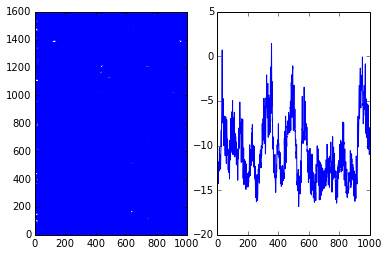

In [6]:
from brian2 import *

# Time constants
taum = 20 * msecond
taue = 5 * msecond
taui = 10 * msecond
# Reversal potentials
Ee = (0. + 60.) * mvolt
Ei = (-80. + 60.) * mvolt

eqs = Equations('''
dv/dt = (-v+ge*(Ee-v)+gi*(Ei-v))*(1./taum) : volt (unless refractory)
dge/dt = -ge*(1./taue) : 1
dgi/dt = -gi*(1./taui) : 1 
''')

P = NeuronGroup(2000, model=eqs, threshold='v>10*mV',
              reset='v=0*mV', refractory=5 * msecond)
Pe = P[:1600]
Pi = P[1600:]
we = 6. / 10. # excitatory synaptic weight (voltage)
wi = 67. / 10. # inhibitory synaptic weight
Ce = Synapses(Pe, P, pre='ge+=we')
Ce.connect(True, p=0.02)
Ci = Synapses(Pi, P, pre='gi+=wi')
Ci.connect(True, p=0.02)
# Initialization
P.v = (randn(len(P)) * 5 - 5) * mvolt
P.ge = randn(len(P)) * 1.5 + 4
P.gi = randn(len(P)) * 12 + 20

# Record all spikes
spikes_e = SpikeMonitor(Pe)
spikes_i = SpikeMonitor(Pi)
# Record the membrane potential of a single neuron
mon_e = StateMonitor(Pe, 'v', record=0)
run(1 * second)

print spikes_e.num_spikes, "excitatory spikes"
print spikes_i.num_spikes, "inhibitory spikes"

subplot(1, 2, 1)
plot(spikes_e.t/ms, spikes_e.i, '.')
subplot(1, 2, 2)
plot(mon_e.t/ms, mon_e[0].v/mV)
show()
